# Weather Report Data Analysis

#### Here. The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions

#### This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

In [60]:
import pandas as pd

## IMPORTING CSV FILE

In [8]:
df = pd.read_csv('Project 1 - Weather Dataset.csv', encoding= 'unicode_escape')

## DATA EXPLORATION

In [9]:
df.shape

(8784, 8)

In [46]:
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month_Name
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,January
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,January
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,January
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,January
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,January
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog,January


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
 8   Year              8784 non-null   int32         
 9   Month             8784 non-null   int32         
 10  Day               8784 non-null   int32         
 11  Hour              8784 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(4), int64(2), object(1)
memory usage: 686.4+ KB


In [9]:
pd.isnull(df).sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [11]:
# Columns
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


#### Adding a Month Name Column.

In [55]:
df['Month_Name'] = df['Date/Time'].dt.month_name()

## EXPLORATORY DATA ANALYSIS

#### Q1. Average Temperature of All Months.

In [56]:
df.groupby('Month')['Temp_C'].mean()

Month
April         7.009306
August       22.279301
December     -3.306317
February     -4.225000
January      -7.371505
July         22.790054
June         20.134028
March         3.121237
May          16.237769
November      0.931389
October      10.954973
September    16.484444
Name: Temp_C, dtype: float64

#### Q2. Temperature Over Time.

<Axes: title={'center': 'Temperature Over Time'}, xlabel='Date/Time'>

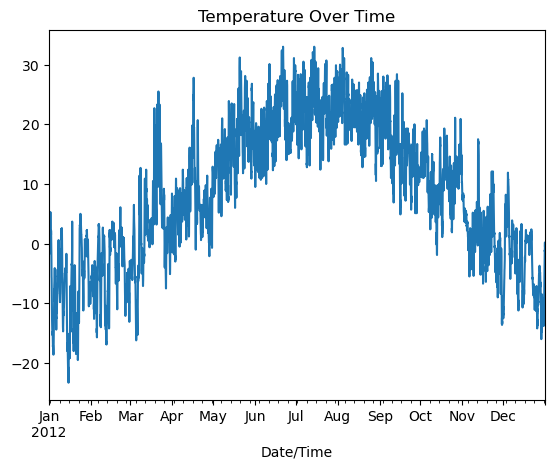

In [57]:
df.set_index('Date/Time')['Temp_C'].plot(title="Temperature Over Time")

#### Q3. Average Temperature, Humidity, Wind Speed by season.

           Temp_C  Rel Hum_%  Wind Speed_km/h
Season                                       
Fall     9.473397  72.331502        14.529762
Spring   8.808786  60.976449        14.883605
Summer  21.751857  63.566123        13.487319
Winter  -4.983929  72.966117        16.897894


<Axes: title={'center': 'Average Temperature by Season'}, xlabel='Season'>

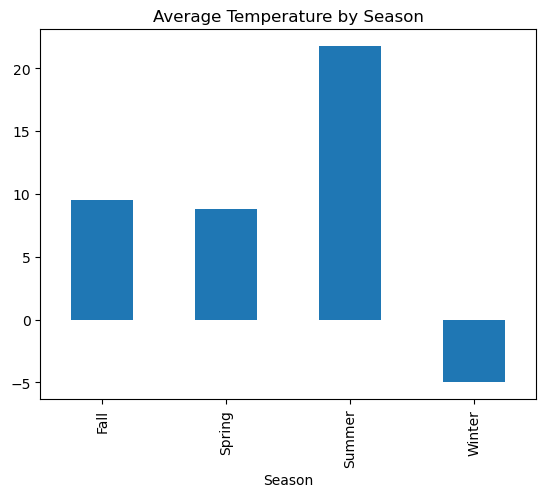

In [68]:
# Map months to seasons
df['Season'] = df['Date/Time'].dt.month % 12 // 3 + 1
season_map = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
df['Season'] = df['Season'].map(season_map)

season_summary = df.groupby('Season')[['Temp_C','Rel Hum_%','Wind Speed_km/h']].mean()
print(season_summary)

# Plot seasonal average temperature
season_summary['Temp_C'].plot(kind='bar', title='Average Temperature by Season')

#### Q4. Visualize average Temperature vs Humidity per weather condition.

<Axes: title={'center': 'Average Temperature and Humidity by Weather Type'}, xlabel='Weather'>

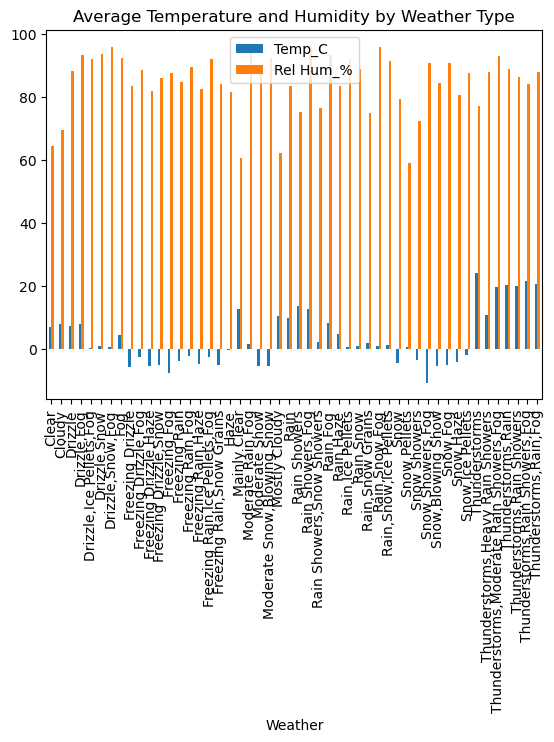

In [80]:
weather_avg = df.groupby('Weather')[['Temp_C','Rel Hum_%']].mean()

# Plot temperature vs humidity for each weather type
weather_avg.plot(kind='bar', title='Average Temperature and Humidity by Weather Type')

#### Q5. Which hour of the day is usually the hottest?

<Axes: title={'center': 'Average Temperature by Hour'}, xlabel='Hour'>

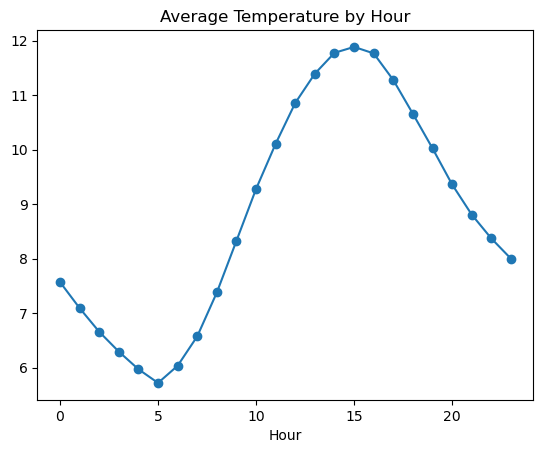

In [71]:
df['Hour'] = df['Date/Time'].dt.hour
hourly_avg_temp = df.groupby('Hour')['Temp_C'].mean()

# Plot average temperature by hour
hourly_avg_temp.plot(kind='line', marker='o', title='Average Temperature by Hour')

#### Q6. Analyze how temperature differs between daytime and nighttime.

<Axes: title={'center': 'Average Day vs Night Temperature'}, xlabel='Day_Night'>

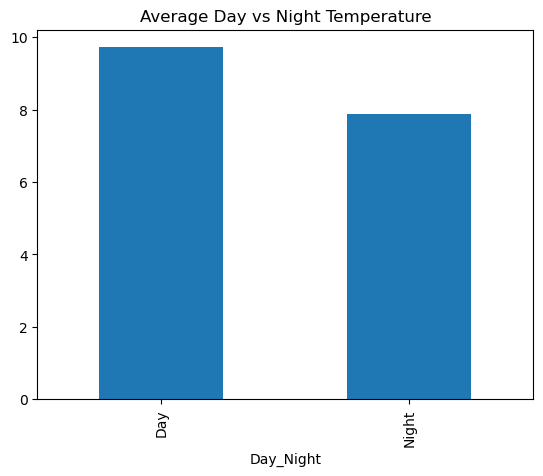

In [75]:
df['Hour'] = df['Date/Time'].dt.hour
df['Day_Night'] = df['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

avg_temp_dn = df.groupby('Day_Night')['Temp_C'].mean()

# Plot comparison
avg_temp_dn.plot(kind='bar', title='Average Day vs Night Temperature')

<Axes: title={'center': 'Average Visibility by Weather Condition'}, xlabel='Weather'>

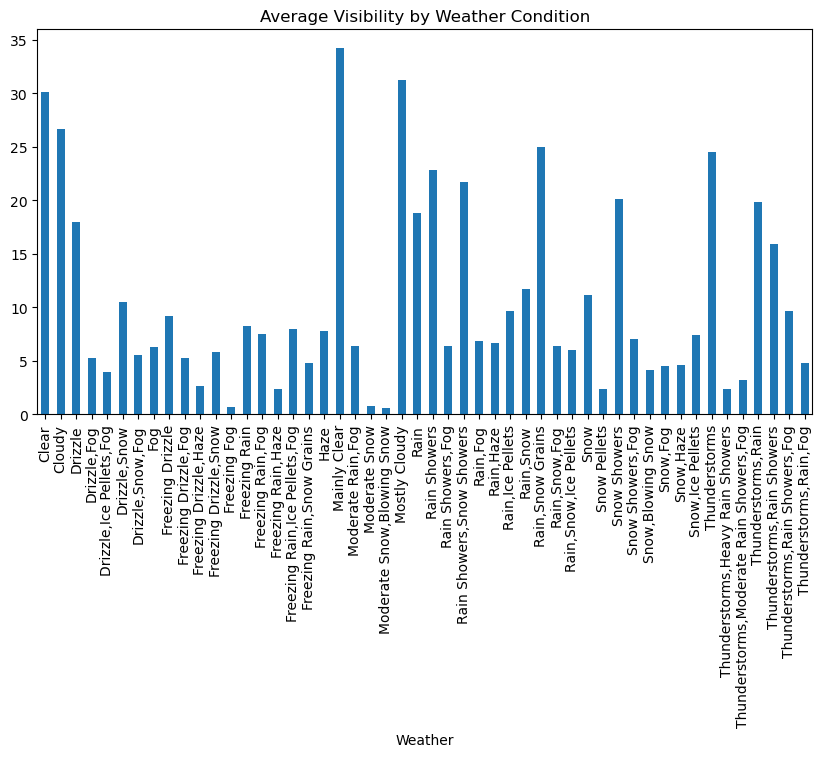

In [79]:
# Calculate average visibility for each weather type
visibility_weather = df.groupby('Weather')['Visibility_km'].mean()

# Bar chart showing average visibility per weather condition
visibility_weather.plot(kind='bar', figsize=(10,5), title='Average Visibility by Weather Condition')

## THANK YOU!!!